In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

646

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dudinka
Processing Record 2 of Set 1 | neuenkirchen
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | san andres
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | comodoro rivadavia
Processing Record 7 of Set 1 | aran
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 10 of Set 1 | arlit
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | laguna
Processing Record 13 of Set 1 | egvekinot
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | constantine
Processing Record 16 of Set 1 | bambous virieux
Processing Record 17 of Set 1 | gari
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | mahebourg
Processing Record 21 of Set 1 | touros
Processing Record 22 of Set 1 | hualmay
Processin

City not found. Skipping...
Processing Record 40 of Set 4 | shulan
Processing Record 41 of Set 4 | bisert
Processing Record 42 of Set 4 | tigil
Processing Record 43 of Set 4 | bethel
Processing Record 44 of Set 4 | pietarsaari
Processing Record 45 of Set 4 | sumenep
Processing Record 46 of Set 4 | kapit
Processing Record 47 of Set 4 | gold coast
Processing Record 48 of Set 4 | tabat
Processing Record 49 of Set 4 | katima mulilo
Processing Record 50 of Set 4 | talnakh
Processing Record 1 of Set 5 | nuuk
Processing Record 2 of Set 5 | hovd
Processing Record 3 of Set 5 | luanda
Processing Record 4 of Set 5 | tasiilaq
Processing Record 5 of Set 5 | george town
Processing Record 6 of Set 5 | vila
Processing Record 7 of Set 5 | cayenne
Processing Record 8 of Set 5 | severo-kurilsk
Processing Record 9 of Set 5 | aanekoski
Processing Record 10 of Set 5 | cozumel
Processing Record 11 of Set 5 | te anau
Processing Record 12 of Set 5 | tual
Processing Record 13 of Set 5 | thompson
Processing Reco

Processing Record 32 of Set 8 | shetpe
Processing Record 33 of Set 8 | husavik
Processing Record 34 of Set 8 | axim
Processing Record 35 of Set 8 | bakchar
Processing Record 36 of Set 8 | iqaluit
Processing Record 37 of Set 8 | swellendam
Processing Record 38 of Set 8 | sechura
Processing Record 39 of Set 8 | rovaniemi
Processing Record 40 of Set 8 | charters towers
Processing Record 41 of Set 8 | uthal
Processing Record 42 of Set 8 | tifton
Processing Record 43 of Set 8 | viligili
City not found. Skipping...
Processing Record 44 of Set 8 | wajid
Processing Record 45 of Set 8 | peniche
Processing Record 46 of Set 8 | lebu
Processing Record 47 of Set 8 | prince rupert
Processing Record 48 of Set 8 | dwarka
Processing Record 49 of Set 8 | saint anthony
Processing Record 50 of Set 8 | ambon
Processing Record 1 of Set 9 | batagay
Processing Record 2 of Set 9 | irkutsk
Processing Record 3 of Set 9 | jiwani
Processing Record 4 of Set 9 | shimanovsk
Processing Record 5 of Set 9 | tuatapere
Pr

Processing Record 21 of Set 12 | sobolevo
Processing Record 22 of Set 12 | manzanillo
Processing Record 23 of Set 12 | beloha
Processing Record 24 of Set 12 | rocha
Processing Record 25 of Set 12 | riyadh
Processing Record 26 of Set 12 | torata
Processing Record 27 of Set 12 | dieppe bay
City not found. Skipping...
Processing Record 28 of Set 12 | gawler
Processing Record 29 of Set 12 | lima
Processing Record 30 of Set 12 | bezhetsk
Processing Record 31 of Set 12 | behbahan
Processing Record 32 of Set 12 | caluquembe
Processing Record 33 of Set 12 | mamlyutka
Processing Record 34 of Set 12 | port saint lucie
Processing Record 35 of Set 12 | coracora
Processing Record 36 of Set 12 | afonino
Processing Record 37 of Set 12 | brandon
Processing Record 38 of Set 12 | den helder
Processing Record 39 of Set 12 | ashqelon
Processing Record 40 of Set 12 | acandi
Processing Record 41 of Set 12 | boulder city
Processing Record 42 of Set 12 | marzuq
Processing Record 43 of Set 12 | dingle
Processi

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dudinka,69.41,86.18,12.20,85,75,22.37,RU,2020-11-26 05:30:17
1,Neuenkirchen,52.24,7.37,46.99,87,75,3.36,DE,2020-11-26 05:30:18
2,Avarua,-21.21,-159.78,75.20,69,77,3.36,CK,2020-11-26 05:30:18
3,San Andres,12.58,-81.70,80.60,88,40,5.82,CO,2020-11-26 05:30:19
4,Rikitea,-23.12,-134.97,74.37,82,100,10.47,PF,2020-11-26 05:30:19
5,Comodoro Rivadavia,-45.87,-67.50,53.60,49,0,18.34,AR,2020-11-26 05:30:19
6,Aran,40.63,46.98,33.80,100,99,2.24,AZ,2020-11-26 05:30:20
7,Castro,-24.79,-50.01,62.69,70,10,4.97,BR,2020-11-26 05:28:09
8,Arlit,18.74,7.39,65.28,30,0,5.93,NE,2020-11-26 05:30:20
9,Longyearbyen,78.22,15.64,17.60,67,75,1.12,SJ,2020-11-26 05:30:21


In [18]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dudinka,RU,2020-11-26 05:30:17,69.41,86.18,12.20,85,75,22.37
1,Neuenkirchen,DE,2020-11-26 05:30:18,52.24,7.37,46.99,87,75,3.36
2,Avarua,CK,2020-11-26 05:30:18,-21.21,-159.78,75.20,69,77,3.36
3,San Andres,CO,2020-11-26 05:30:19,12.58,-81.70,80.60,88,40,5.82
4,Rikitea,PF,2020-11-26 05:30:19,-23.12,-134.97,74.37,82,100,10.47
5,Comodoro Rivadavia,AR,2020-11-26 05:30:19,-45.87,-67.50,53.60,49,0,18.34
6,Aran,AZ,2020-11-26 05:30:20,40.63,46.98,33.80,100,99,2.24
7,Castro,BR,2020-11-26 05:28:09,-24.79,-50.01,62.69,70,10,4.97
8,Arlit,NE,2020-11-26 05:30:20,18.74,7.39,65.28,30,0,5.93
9,Longyearbyen,SJ,2020-11-26 05:30:21,78.22,15.64,17.60,67,75,1.12


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

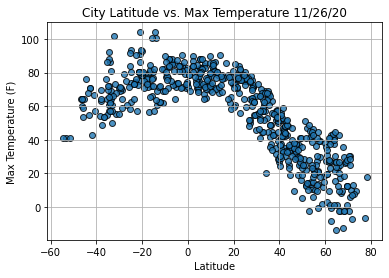

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

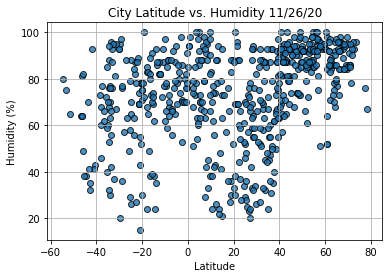

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

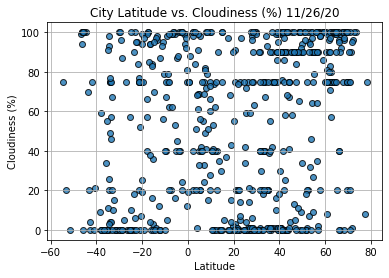

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

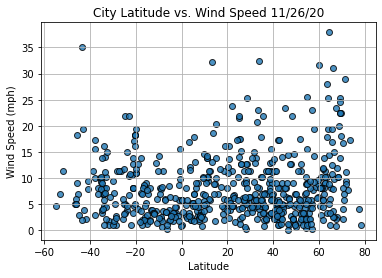

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()